In [9]:
from generate_test_beam import generate_test_beam, generate_test_images

tensor([-25.], device='cuda:0') tensor(171.3551, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(103.3086, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(53.5571, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(21.0476, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(4.7685, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(3.7488, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(17.0558, device='cuda:0', dtype=torch.float64)


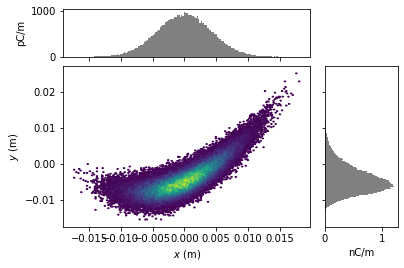

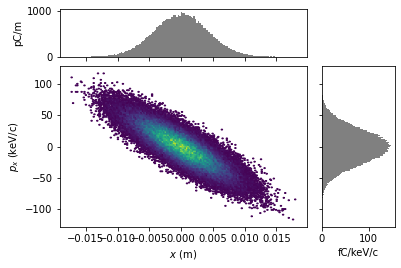

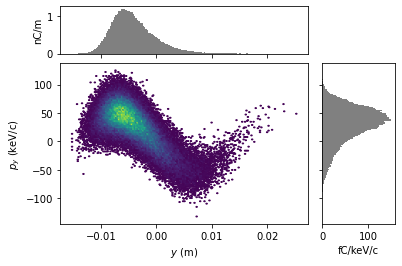

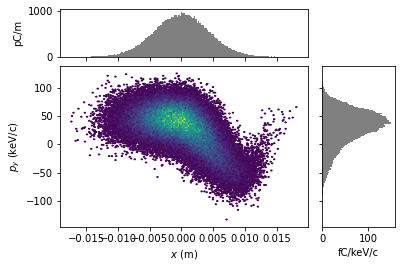

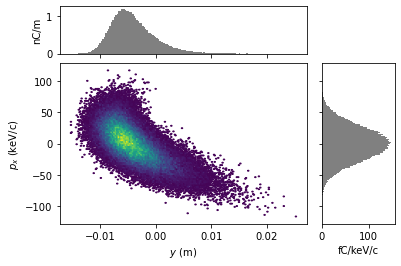

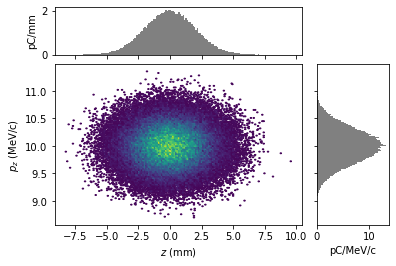

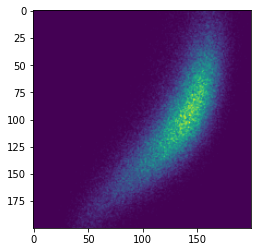

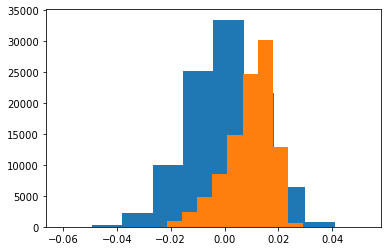

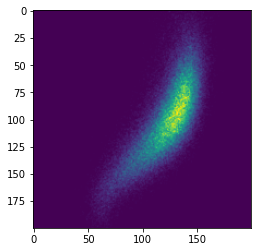

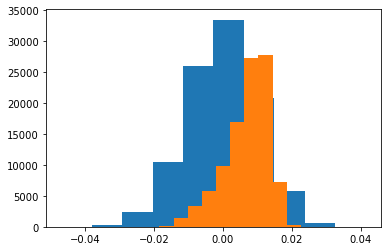

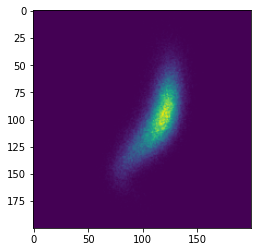

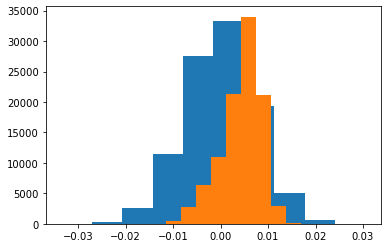

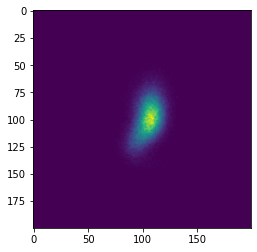

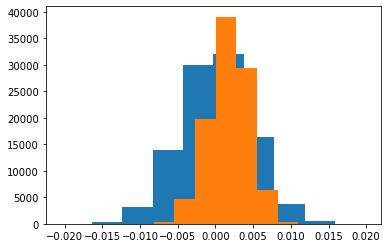

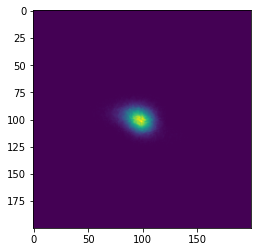

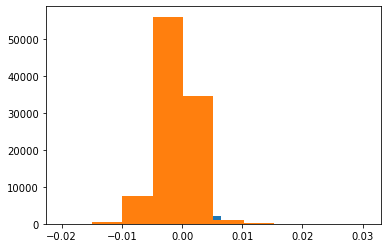

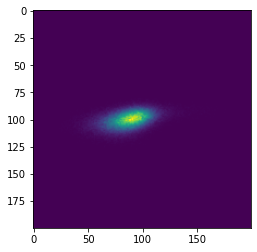

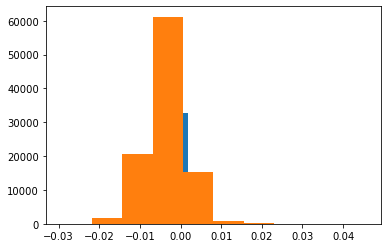

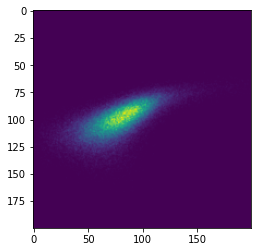

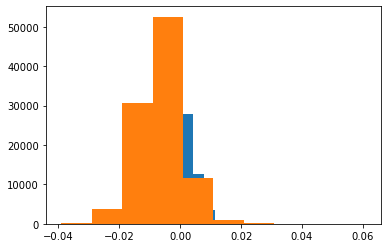

In [10]:
generate_test_images()

In [11]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [12]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 9.020125783036986e-06
beta 1.7388685803060686
alpha 1.010398870890324
gamma 1.1621958675800157


In [13]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 6.000059998485762e-06
beta 3.000000001057127
alpha 1.666666667709599
gamma 1.2592592599743406


In [14]:
beam_coords.shape

torch.Size([100000, 6])

In [15]:
bins = torch.load("bins.pt")

In [16]:
bins[1]-bins[0]

tensor(0.0003)